<a href="https://colab.research.google.com/github/VenkyGitRep/AI_HCI/blob/main/HCI_AI_First_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 1st Homework Assignment in Human A.I.

This assignment will ramp you up on being able to process large scale data sets and use them for Human A.I. interaction. We will work in particular with the dataset of full_home_loans.csv which is about home loan applications in Washington state, USA, where each row of the dataset is an individual loan application.

**Goal.** Your goal in this assignment is to build a machine learning model that can accurately predict whether a given loan application was accepted or rejected. In order to accomplish this you will learn skills to: (1)  process large scale data; (2) preparing the data for the machine learning models; (3) developing machine learning models.(4) creating your own machine learning datasets.


**Part 1: Data Exploration**
The first few exercises will get you used to looking at the data using pandas. Pandas is a widely used library in python for manipulating data. Why? Datasets can consume a lot of space in your computer's memory and traditional python data structures like lists or dictionaries will become painfully slow as we add thousands of rows of data. We use a specialized dataset library pandas which has a specialized data structure called a dataframe designed to be ultra fast & efficient. Documentation is here: https://pandas.pydata.org/pandas-docs/stable/




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:

from google.colab import files
from __future__ import print_function
import io
import pandas as pd



#Code to upload the dataset from your computer as a dataframe
#uploaded = files.upload()
#nameFile="home_loans.csv"
#bytesFile=io.BytesIO(uploaded[nameFile])
df=pd.read_csv("home_loans.csv", sep=",")


<ipython-input-53-a52f3eb73fd4>:12: DtypeWarning: Columns (10,11,12,14,15,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("home_loans.csv", sep=",")


# `Processing Data Using Pandas`

To understand what kind of data was collected, pandas has some handy commands:

* **df.head()** will show us the first 5 rows of our dataset. You can
also specify the first N rows, like df.head(18) will show us the first 18 rows.
* **df.sample(10)** will show us 10 randomly sampled rows of our dataset
* **df.shape** will tell us how many rows and how many columns are in the dataset
* **df.columns** will list the names of all columns in the dataset
* **df.describe()** will give you summary statistics about all numerical columns in the dataset


## Question 1.A: How many rows are in this dataset? How many columns?

 Show your work in code below if applicable.



In [ ]:
df.shape
#Add your response and code here:

(369281, 27)

## Question 1.B: One of the columns in the dataset is the outcome value for each application, the value we will try to predict. Which column is that?


In [ ]:
#Add your response and code here:
df.columns
#Answer : loan_approved

Index(['town_name', 'county_name', 'loan_amount_000s', 'applicant_income_000s',
       'property_type_name', 'occupied_by_owner', 'loan_type_name',
       'is_hoepa_loan', 'loan_purpose_name', 'loan_approved',
       'denial_reason_name_3', 'denial_reason_name_2', 'denial_reason_name_1',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_race_name_4',
       'applicant_race_name_3', 'applicant_race_name_2',
       'applicant_race_name_1', 'applicant_ethnicity_name'],
      dtype='object')

## Question 1.C: What reasons were given in this dataset for denying a loan application?

Hint: There are 3 columns in the dataset that list why a loan was denied. Try looking up the pandas command to list the unique values in a column.

Show your work in code below if applicable.

In [ ]:
from pandas.core.algorithms import unique
#Add your response and code here:
# Combine the three columns into a single Series
combined_series = pd.concat([df['denial_reason_name_1'], df['denial_reason_name_2'], df['denial_reason_name_3']])

# Get unique values from the combined Series
unique_values_all = combined_series.unique()
unique_values_all

array([nan, 'Other', 'Credit application incomplete', 'Collateral',
       'Debt-to-income ratio', 'Credit history',
       'Unverifiable information', 'Employment history',
       'Insufficient cash (downpayment, closing costs)',
       'Mortgage insurance denied'], dtype=object)

In [ ]:
df['denial_reason_name_1'].unique()

array([nan, 'Other', 'Credit application incomplete', 'Collateral',
       'Debt-to-income ratio', 'Credit history',
       'Unverifiable information', 'Employment history',
       'Insufficient cash (downpayment, closing costs)',
       'Mortgage insurance denied'], dtype=object)

In [ ]:
len(df['denial_reason_name_2'].unique())

10

In [ ]:
len(df['denial_reason_name_3'].unique())

10

## Question 1.D: Given the denial reasons and the columns in this dataset, think about what information you don't have about each application. Rank your top 3 missing pieces of information about each application that could help you better predict the application's loan outcome.

Show your work in code below if applicable.



1.   applicant_income_000s
2.   town
3.   county_name

Comments : I've visualised the data below. I visualise the number of null values for every column for a given denail_reason. Its evident from the graph that application_income_000s, town and county_name are the missing information. I've not included other details like denail reason_2,denail_reason_3 and coapplicant details in the result here(but can be seen in the visualization below). Im assuming coapplication details(name and race) should'nt be a factor for loan approval. And denail reasons are probably null because denail_reason_1 is self sufficicent. Finally, it looks like loans are denied for applicants who fail to specify thier town/county.




In [105]:
# Define the specific columns to check for NaN
columns_to_check = ['county_name','applicant_income_000s','applicant_race_name_1','applicant_ethnicity_name', 'loan_amount_000s','applicant_ethnicity_name']
denial_reasons = ['Other', 'Credit application incomplete', 'Collateral',
       'Debt-to-income ratio', 'Credit history',
       'Unverifiable information', 'Employment history',
       'Insufficient cash (downpayment, closing costs)',
       'Mortgage insurance denied']

for denail_reason in denial_reasons:
  print(f"Number of rows where denail_reason_1 is {denail_reason} and",end='')
  for column_to_check in columns_to_check:
    print(f" {column_to_check} is null is {df[df['denial_reason_name_1'] == denail_reason][column_to_check].isna().sum()}",end=', ')
  print("")

Number of rows where denail_reason_1 is Other and county_name is null is 6,  applicant_income_000s is null is 338,  applicant_race_name_1 is null is 0,  applicant_ethnicity_name is null is 0,  loan_amount_000s is null is 0,  applicant_ethnicity_name is null is 0, 
Number of rows where denail_reason_1 is Credit application incomplete and county_name is null is 4,  applicant_income_000s is null is 521,  applicant_race_name_1 is null is 0,  applicant_ethnicity_name is null is 0,  loan_amount_000s is null is 0,  applicant_ethnicity_name is null is 0, 
Number of rows where denail_reason_1 is Collateral and county_name is null is 3,  applicant_income_000s is null is 145,  applicant_race_name_1 is null is 0,  applicant_ethnicity_name is null is 0,  loan_amount_000s is null is 0,  applicant_ethnicity_name is null is 0, 
Number of rows where denail_reason_1 is Debt-to-income ratio and county_name is null is 16,  applicant_income_000s is null is 288,  applicant_race_name_1 is null is 0,  applica

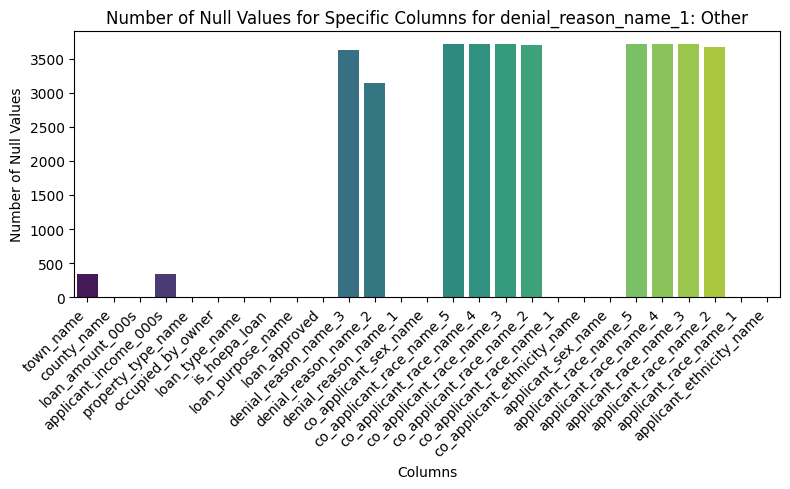

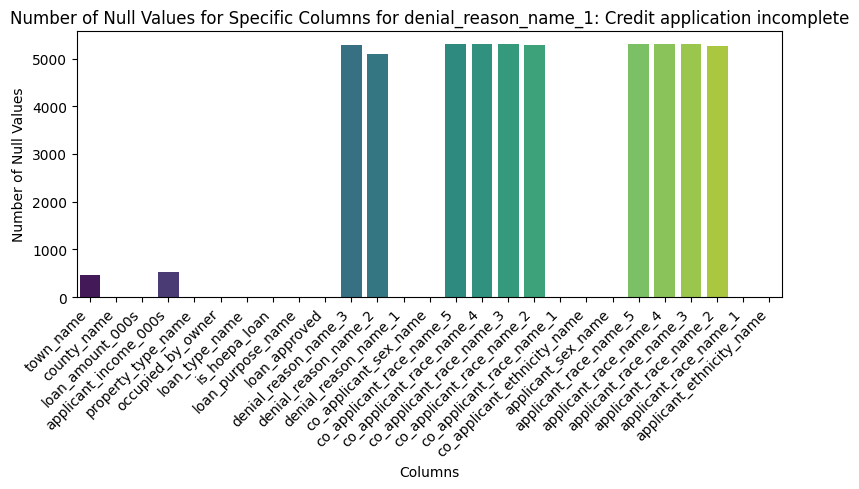

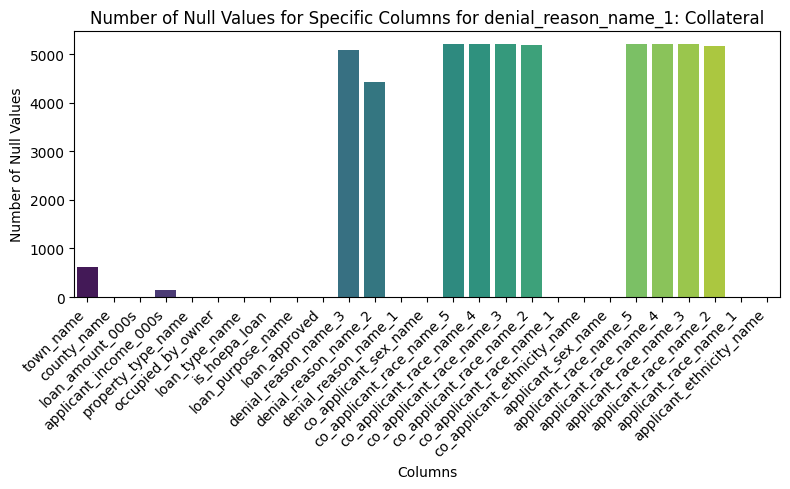

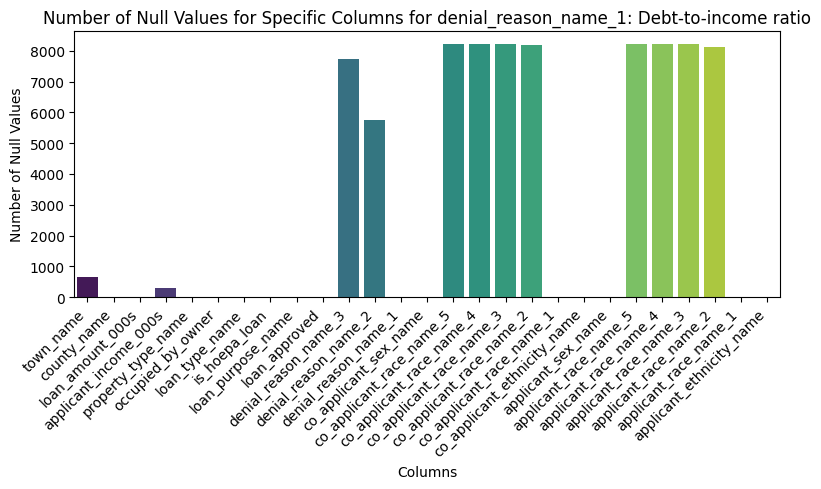

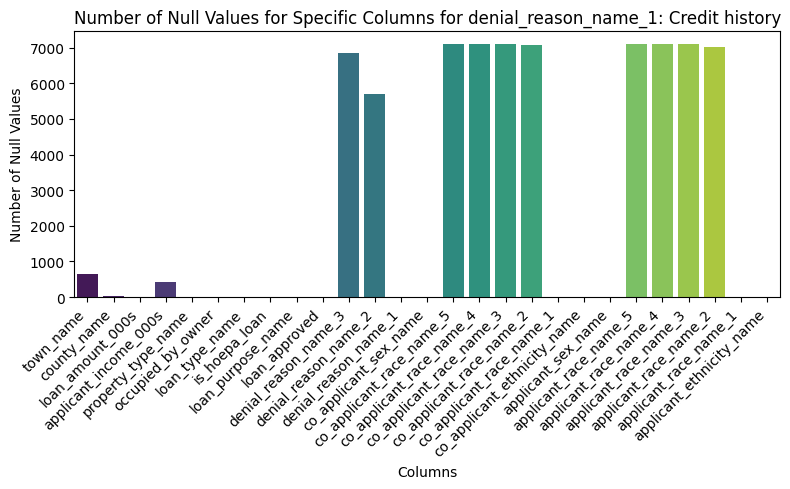

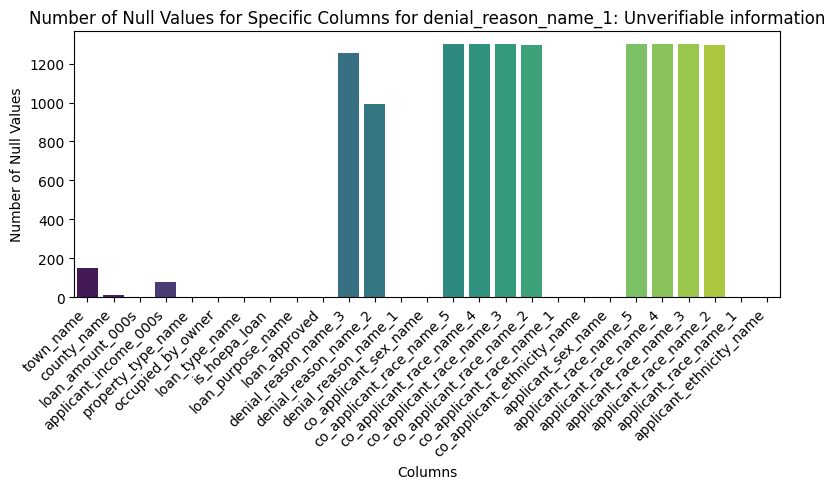

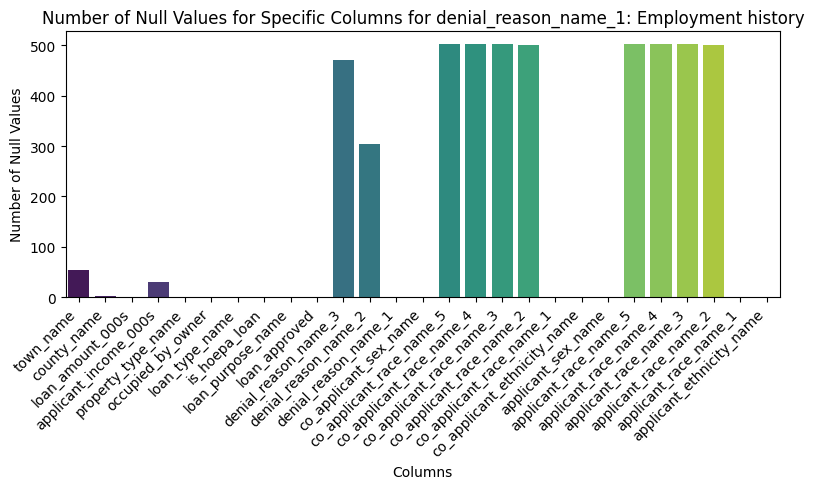

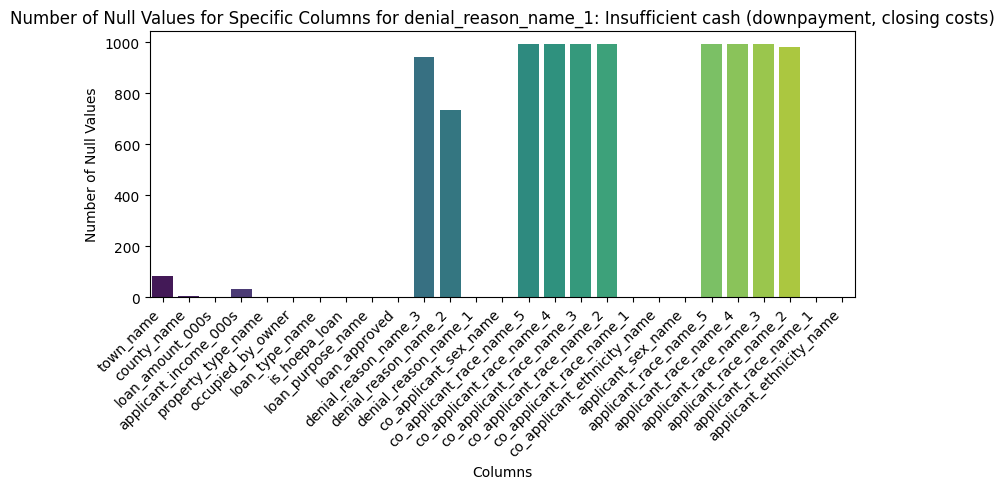

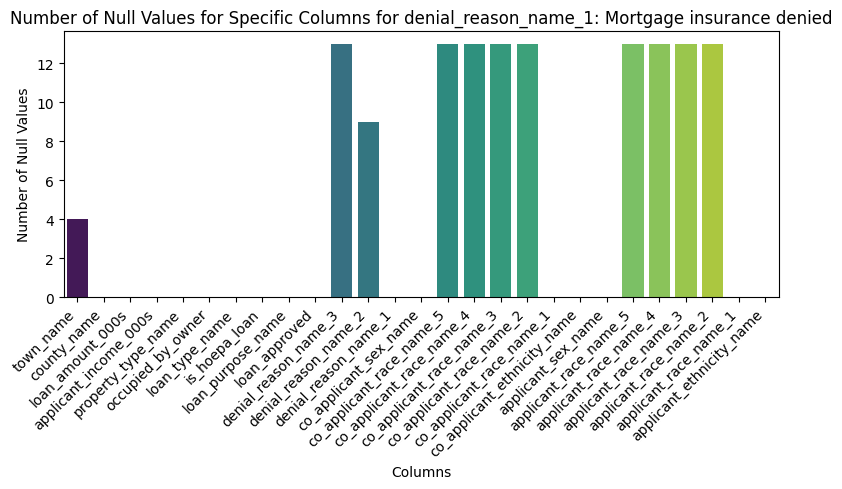

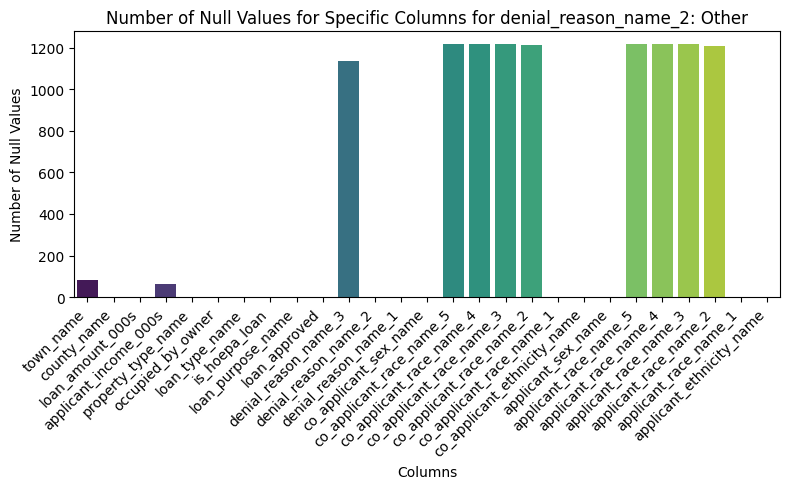

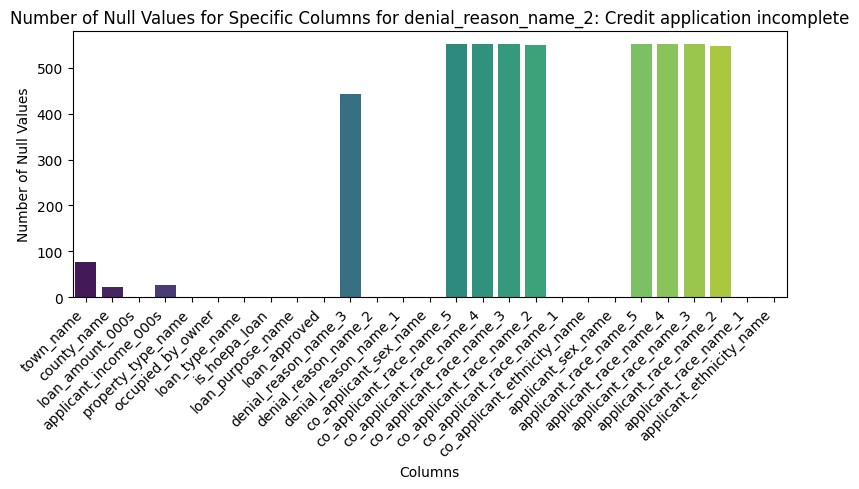

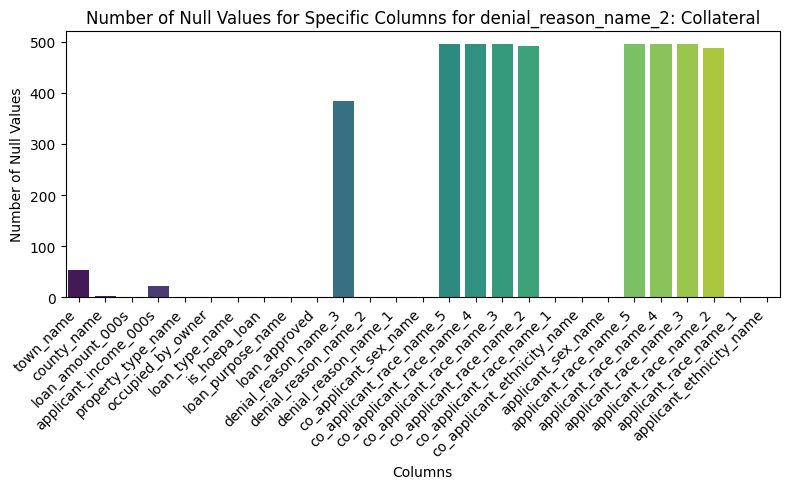

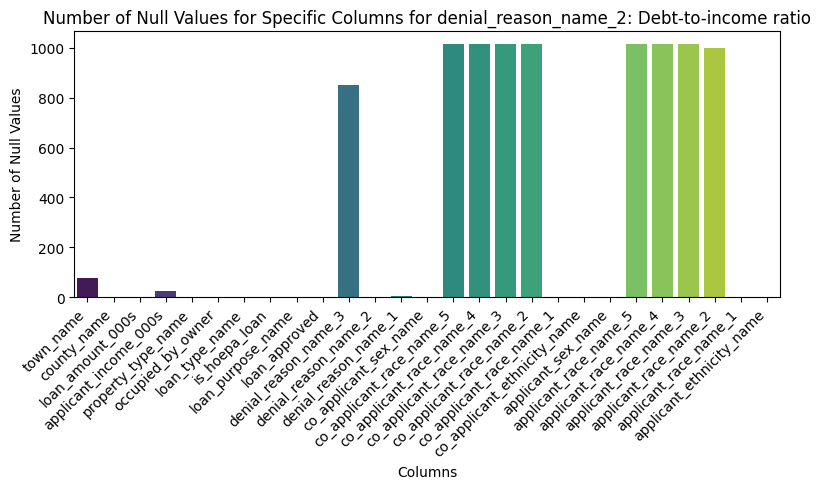

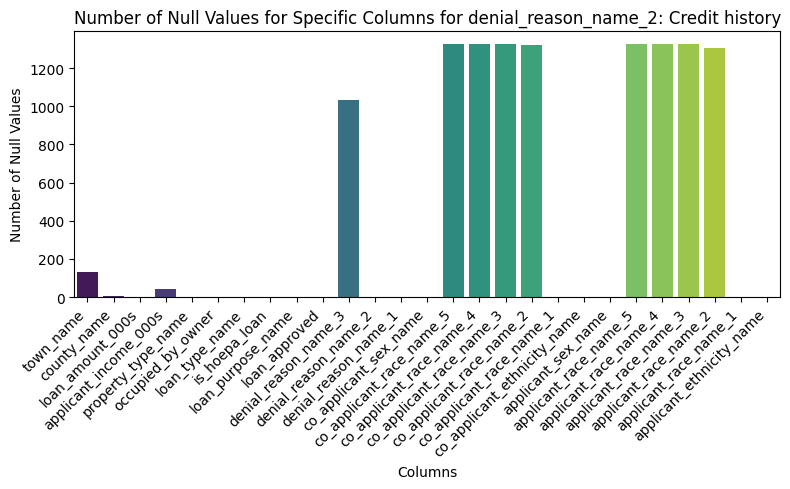

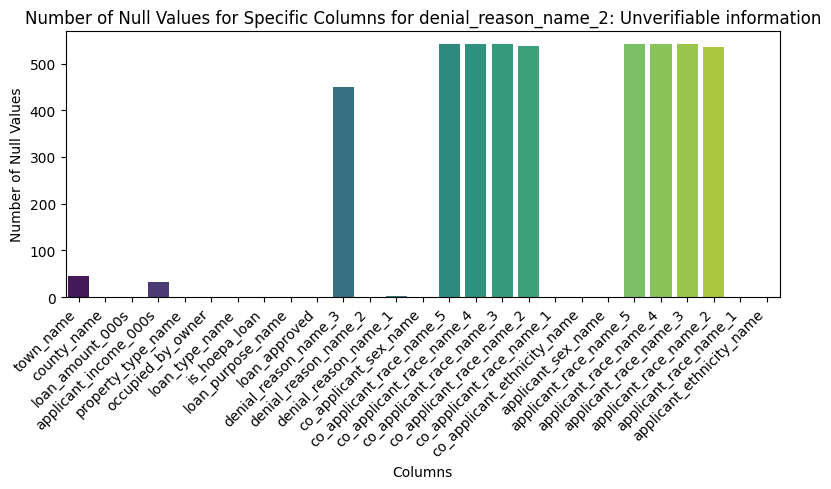

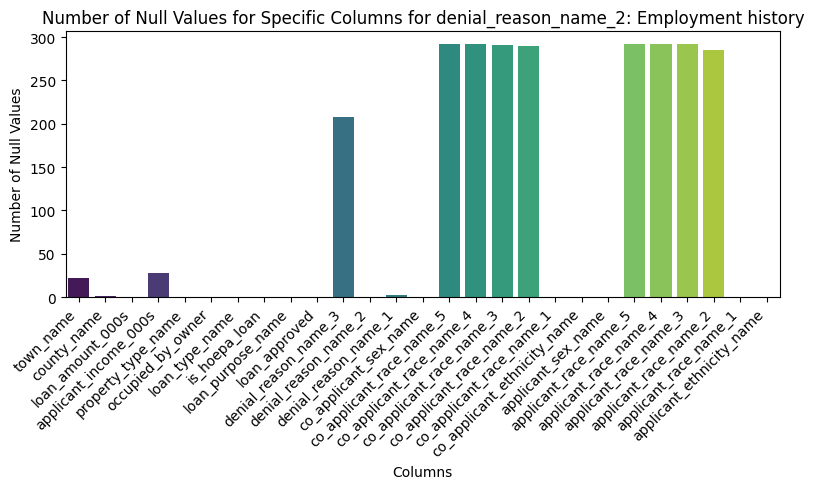

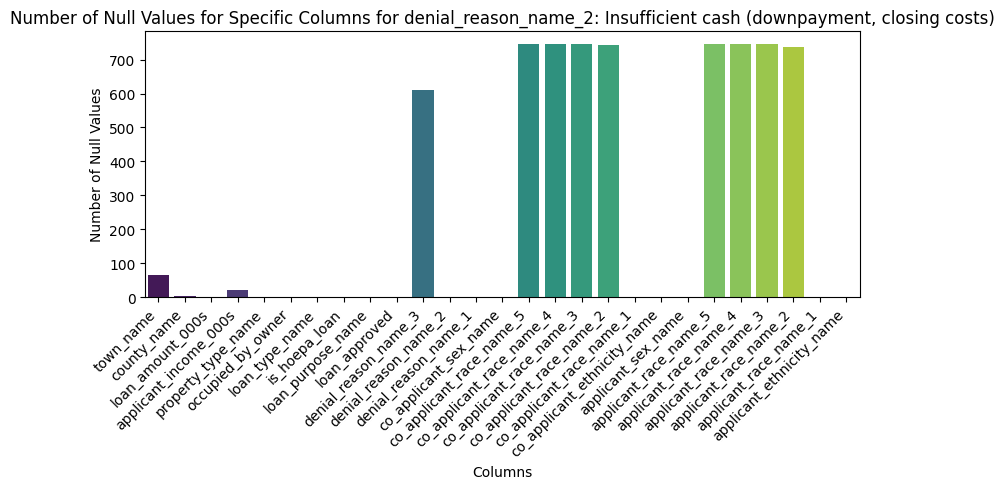

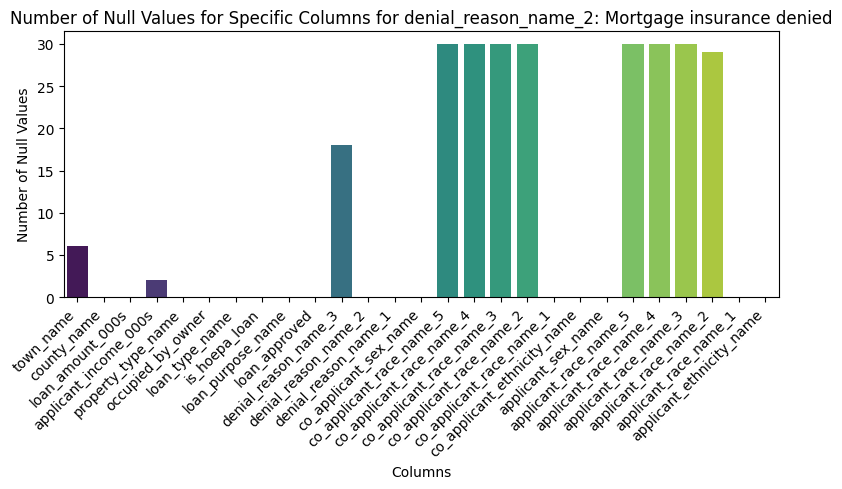

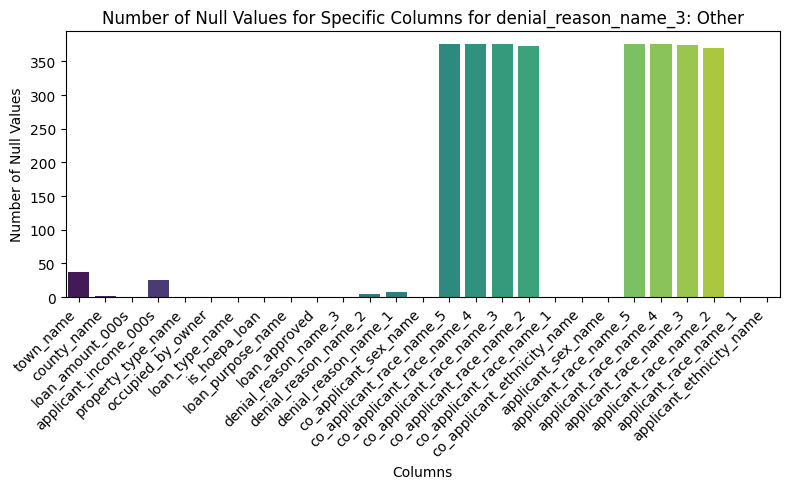

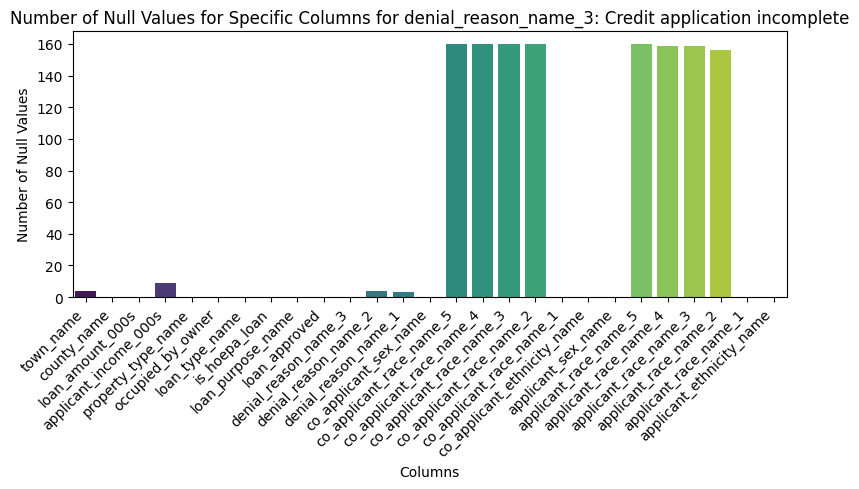

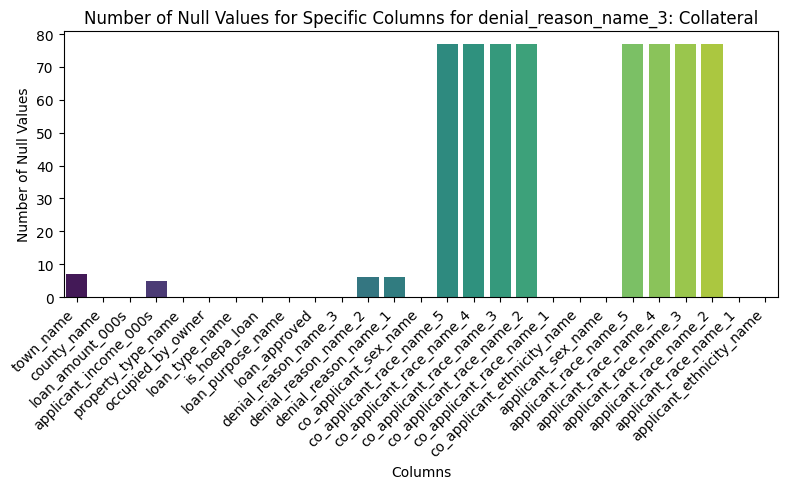

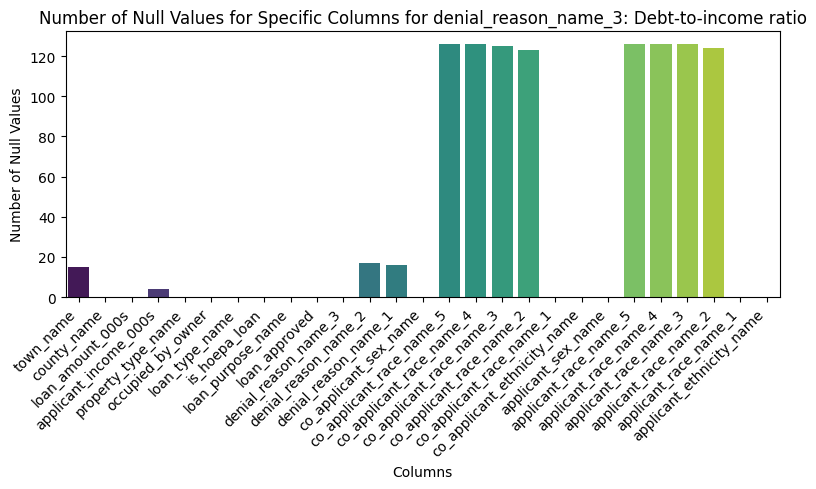

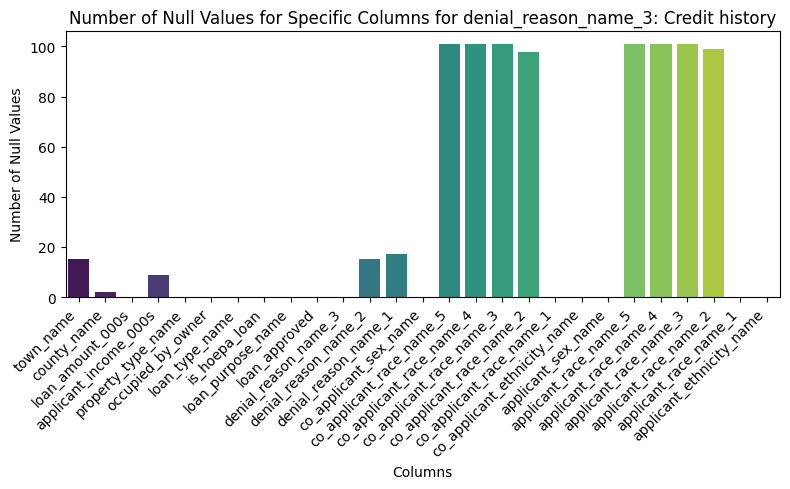

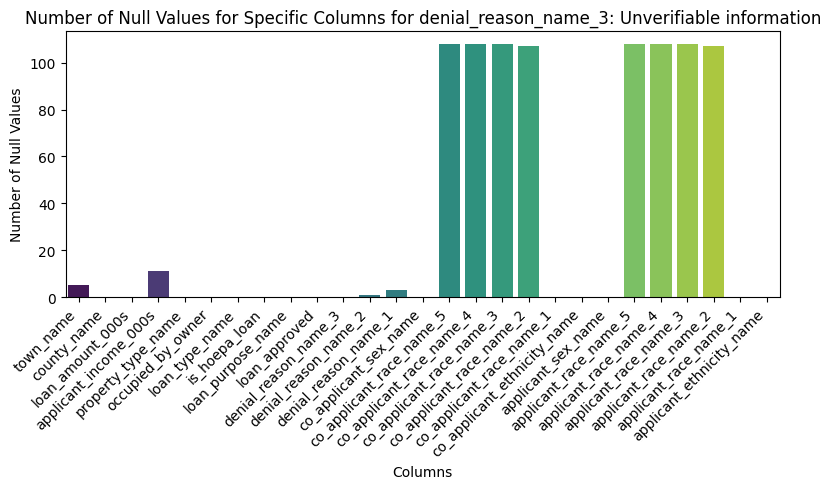

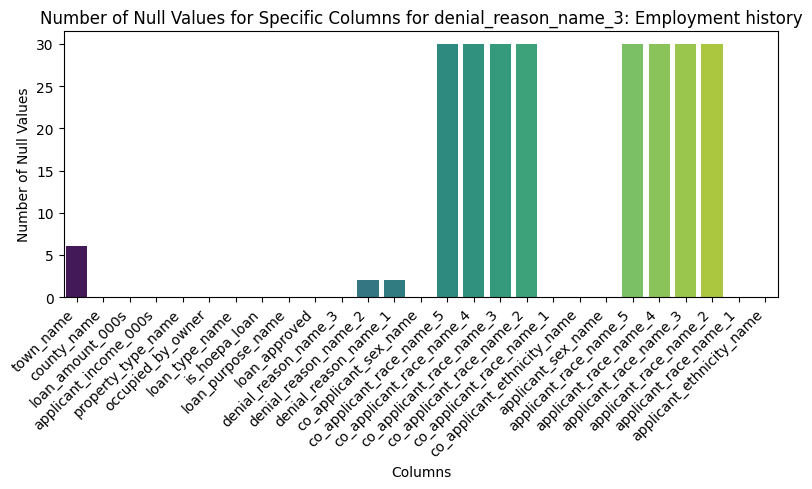

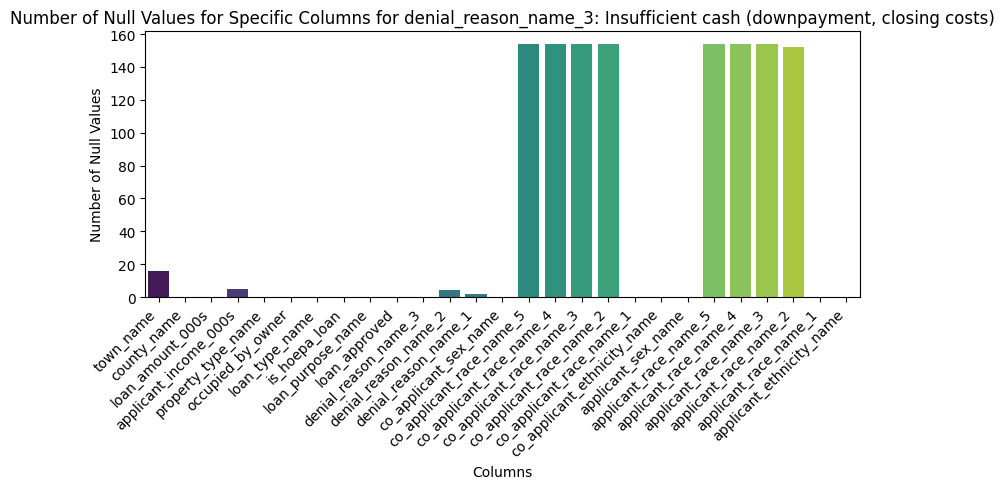

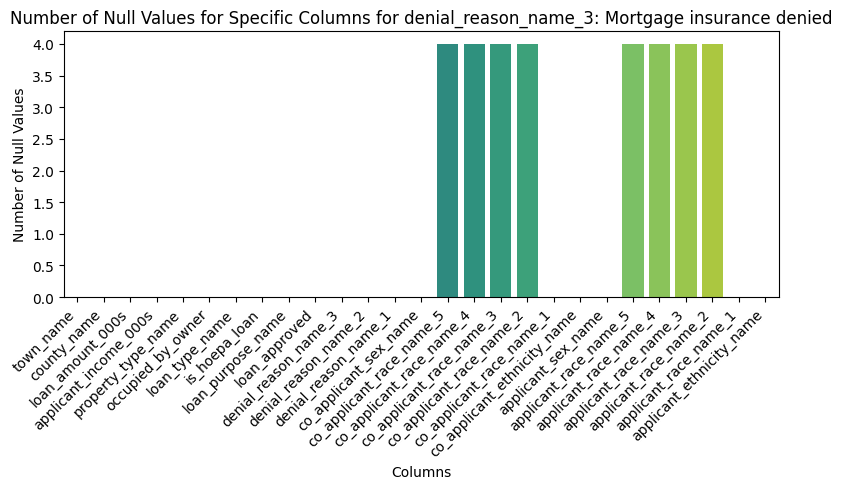

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_check = ['town_name', 'county_name', 'loan_amount_000s', 'applicant_income_000s',
       'property_type_name', 'occupied_by_owner', 'loan_type_name',
       'is_hoepa_loan', 'loan_purpose_name', 'loan_approved',
       'denial_reason_name_3', 'denial_reason_name_2', 'denial_reason_name_1',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_race_name_4',
       'applicant_race_name_3', 'applicant_race_name_2',
       'applicant_race_name_1', 'applicant_ethnicity_name']
denial_reasons = ['Other', 'Credit application incomplete', 'Collateral',
       'Debt-to-income ratio', 'Credit history',
       'Unverifiable information', 'Employment history',
       'Insufficient cash (downpayment, closing costs)',
       'Mortgage insurance denied']
denial_reason_names=['denial_reason_name_1','denial_reason_name_2','denial_reason_name_3']
#Loop through denail reason columns
for denial_reason_name in denial_reason_names:
  # Loop through denial reasons
  for denial_reason in denial_reasons:
      # Initialize a dictionary to store counts for each column
      #counts_dict = {column: [] for column in columns_to_check}
      counts_dict = {column: [] for column in columns_to_check}

      # Calculate and store the counts for each column for the current denial reason
      for column_to_check in columns_to_check:
          count_null = df[df[denial_reason_name] == denial_reason][column_to_check].isna().sum()
          counts_dict[column_to_check].append(count_null)

      # Create a DataFrame from the counts_dict
      counts_df = pd.DataFrame(counts_dict, index=[denial_reason])

      # Create a bar plot for the current denial reason
      plt.figure(figsize=(8, 5))
      sns.barplot(data=counts_df, palette='viridis')
      plt.xlabel('Columns')
      plt.ylabel('Number of Null Values')
      plt.title(f'Number of Null Values for Specific Columns for {denial_reason_name}: {denial_reason}')
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()


,town_name,county_name,loan_amount_000s,applicant_income_000s,property_type_name,occupied_by_owner,loan_type_name,is_hoepa_loan,loan_purpose_name,loan_approved,...,co_applicant_race_name_2,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name


# **Part 2: Preparing Data to Input to a Model**

Here we'll start using scikit-learn which provides simple library calls for most things we'd like to do in a simple machine learning pipeline. If you haven't used scikit-learn before this tutorial may be useful to give you a sense of what the library can do: https://scikit-learn.org/stable/tutorial/basic/tutorial.html

Machine learning models can only understand data that is represented numerically, but lots of the columns in our dataset like "town_name" are text categorical data. Meanwhile, many models do better when continous numerical data is within small, consistent ranges, such as all data being between -1, 0 and 1, which is definitely not the case with our thousands of dollars loan units.

So first, we will seperate out our samples (called X) into features we'd like to include in our model that are categorical or continous so that we can preprocess each appropriately seperately.

In [163]:
import sklearn # import scikit-learn
from sklearn import preprocessing # import preprocessing utilites

features_cat = ['loan_purpose_name', 'applicant_sex_name']
features_num = ['loan_amount_000s', 'applicant_income_000s']

X_cat = df[features_cat]
print (X_cat)
X_num = df[features_num]
print (X_num)

       loan_purpose_name applicant_sex_name
0            Refinancing             Female
1          Home purchase               Male
2            Refinancing               Male
3            Refinancing               Male
4       Home improvement             Female
...                  ...                ...
369276     Home purchase             Female
369277     Home purchase               Male
369278     Home purchase             Female
369279     Home purchase               Male
369280     Home purchase               Male

[369281 rows x 2 columns]
        loan_amount_000s  applicant_income_000s
0                    227                  116.0
1                    240                   42.0
2                    241                  117.0
3                    351                  315.0
4                    417                  114.0
...                  ...                    ...
369276               178                   97.0
369277               110                   30.0
369278       

**Part 2.A One Hot Encode Categorical Variables**

Run the following code to one hot encode the categorical features:

In [164]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_cat) # fit the encoder to categories in our data
one_hot = enc.transform(X_cat) # transform data into one hot encoded sparse array format


In [165]:
enc.get_feature_names_out(input_features=X_cat.columns)

array(['loan_purpose_name_Home improvement',
       'loan_purpose_name_Home purchase', 'loan_purpose_name_Refinancing',
       'applicant_sex_name_Female',
       'applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_sex_name_Male', 'applicant_sex_name_Not applicable'],
      dtype=object)

In [166]:
# Finally, put the newly encoded sparse array back into a pandas dataframe so that we can use it
X_cat_proc = pd.DataFrame(one_hot.toarray(), columns=enc.get_feature_names_out(input_features=X_cat.columns))
X_cat_proc.head()


,loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,applicant_sex_name_Female,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0


##Question 2.A: In your own words, how is one hot coding tranforming the categorical data? What does the term "one-hot" refer to?

In [ ]:
#Add your response here
The converts categorical data to columns with binary values. Specifically, it creates number of new columns equivalent to number of unique categories, and then encodes data such that for any row only one of the newly created columns is 1 and everything else is 0. The column which is 1 is hot, while the other columns are cold.

## Part 2.B Scaling down continuous numerical data
Run the following code to normalize any continous numberical features, such as loan dollar amount, between -1 and 0. This process will ensure that the average of that feature, such as the average amount that a person asks for in loan amount, is scaled to 0. Values less than the average will be negative numbers, and values larger than the average will be positive numbers.

In [167]:
scaled = preprocessing.scale(X_num)
X_num_proc = pd.DataFrame(scaled, columns=features_num)
X_num_proc.head()

,loan_amount_000s,applicant_income_000s
0,-0.130864,0.016448
1,-0.103680,-0.596232
2,-0.101589,0.024727
3,0.128424,1.664059
4,0.266432,-0.000111


## Part 2.C Merge our feature sets into one sample dataset X and fix NaN values
Run the code below to combine the numerical and categorical feature sets.

In [168]:
X = pd.concat([X_num_proc, X_cat_proc], axis=1, sort=False)
X.head()

,loan_amount_000s,applicant_income_000s,loan_purpose_name_Home improvement,loan_purpose_name_Home purchase,loan_purpose_name_Refinancing,applicant_sex_name_Female,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable
0,-0.130864,0.016448,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.103680,-0.596232,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.101589,0.024727,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.128424,1.664059,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.266432,-0.000111,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Question 2.C The code line below removes any NaN values in our sample with 0. NaNs are missing values that a model won't be able to understand. What is the semantic meaning of replaceing a NaN with 0 for the categorical variables? And for the continous numerical variables?


In [ ]:
# Add your response here.
For categorical values, setting 0 is saying the datapoint doesn't belong to that specific category. Setting all categories of a feature to 0 may introduce some bias in the dataset, but this is one easy approach to dealing with missing data.
Setting 0 continuous numerical values, especially for columns which are scaled and have an average of 0 is another common approach to filling in values for missing data. This goes one step further and could be considered to be better estimator of the missing value as we have only keyed in an average of exising values.

In [169]:
X = X.fillna(0) # remove NaN values

## Part 2.D Create our target array y that our model will try to predict

In [170]:
y = df['loan_approved'] # target

## Part 2.E Split our data into training, test, and validation sets
Run the code below to split the data. Both validation and test sets will be used for testing our model, but use the validation set while you are developing and improving your model, and leave the test for late stage evaluation.

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_TEMP, y_train, y_TEMP = train_test_split(X, y, test_size=0.30) # split out into training 70% of our data
X_validation, X_test, y_validation, y_test = train_test_split(X_TEMP, y_TEMP, test_size=0.50) # split out into validation 15% of our data and test 15% of our data
print(X_train.shape, X_validation.shape, X_test.shape) # print data shape to check the sizing is correct

(258496, 9) (55392, 9) (55393, 9)


## Question 2.E: In a single sentence, what is the difference between train, test, and validation sets?
Post your response below.

In [ ]:
#Write your response here.
Train data helps the model learn from data, specifically it learns parameters of a complex/simple polynomial. Validation sets is a portion of data on which a model gets feedback from. The model learns parameters from training data, then compares its performance using a loss function on the validation set. The model iteratively(depending on epochs) attempts to reduce the loss by retraining and comparing perfomance against the validation set. Test data is used to determine the final performance of the model, it us used to compute qualitative mesaures of its performance.

# Part 3. Developing Models
Scikit-learn has a substantial library of different models we can use for classification. Below are implemented two of the most simple classification models, Logistic Regression and Dummy Classifier.

In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# helper method to print basic model metrics
def metrics(y_true, y_pred):
    print('Confusion matrix:\n', confusion_matrix(y_true, y_pred))
    print('\nReport:\n', classification_report(y_true, y_pred))

In [173]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs').fit(X_train, y_train) # first fit (train) the model
y_pred = model.predict(X_validation) # next get the model's predictions for a sample in the validation set
metrics(y_validation, y_pred) # finally evaluate performance

Confusion matrix:
 [[    0  9142]
 [    0 46250]]

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9142
           1       0.83      1.00      0.91     46250

    accuracy                           0.83     55392
   macro avg       0.42      0.50      0.46     55392
weighted avg       0.70      0.83      0.76     55392



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Dummy Classifier is a 'dummy' because it is going to use zero machine learning, and simply predict "approve this loan" (value 1) for every loan it sees.

In [174]:
from sklearn.dummy import DummyClassifier

approve_everyone = DummyClassifier(strategy='constant', constant = 1).fit(X_train, y_train) # first fit (train) the model
y_pred_dummy = approve_everyone.predict(X_validation) # next get the model's predictions for a sample in the validation set
metrics(y_validation, y_pred_dummy) # finally evaluate performance

Confusion matrix:
 [[    0  9142]
 [    0 46250]]

Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9142
           1       0.83      1.00      0.91     46250

    accuracy                           0.83     55392
   macro avg       0.42      0.50      0.46     55392
weighted avg       0.70      0.83      0.76     55392



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Question 3.A: Considering only the data itself, why do Logistic Regression and the Dummy Classifier perform the same? What is the semantic meaning for why Dummy Classifier has such high accuracy?
Show your work below.

In [ ]:
#Add your response here
The dummy classifier performs as good as Logistic regression because of the quality of data. Specifically, there are 60380 records where loan was declined, and 5 times that number for number of approved loans. Only one in six applicants get rejected, with this knowledge even the dummy classifier is correct 5/6 times and thats why it has high accuracy.

# **Part 4: Your turn!**

## Task 4.A: Create a new balanced dataset where exactly half of the samples are rejected loan applications and half are accepted loan application.

show your work below

In [175]:
#Add your response here.
#Getting 50k records of loan approved and declined records each randomly.
positives_random=df[df['loan_approved']==1].sample(n=50000)
negatives_random=df[df['loan_approved']==0].sample(n=50000)

balanced_df = pd.concat([positives_random,negatives_random],axis=0)

In [200]:
#Preprocessing as done above
features_cat = ['loan_purpose_name', 'applicant_sex_name']
features_num = ['loan_amount_000s', 'applicant_income_000s']

#Getting categorical and numerical features
X_cat = balanced_df[features_cat]
X_num = balanced_df[features_num]

#balanced_df.dropna(subset=['loan_purpose_name', 'applicant_sex_name'],inplace=True)

#Scaling numerical data
scaled = preprocessing.scale(X_num)
X_num_proc = pd.DataFrame(scaled, columns=features_num)
X_num_proc.head()

#One-hotencoding of categorical data
enc = preprocessing.OneHotEncoder()
enc.fit(X_cat) # fit the encoder to categories in our data
one_hot = enc.transform(X_cat) # transform data into one hot encoded sparse array format
enc.get_feature_names_out(input_features=X_cat.columns)
#Finally, put the newly encoded sparse array back into a pandas dataframe so that we can use it
X_cat_proc = pd.DataFrame(one_hot.toarray(), columns=enc.get_feature_names_out(input_features=X_cat.columns))
X_cat_proc.head()


X = pd.concat([X_num_proc, X_cat_proc], axis=1, sort=False)
X.head()
X = X.fillna(0) # remove NaN values

y = balanced_df['loan_approved'] # target

X_train, X_TEMP, y_train, y_TEMP = train_test_split(X, y, test_size=0.30) # split out into training 70% of our data
X_validation, X_test, y_validation, y_test = train_test_split(X_TEMP, y_TEMP, test_size=0.50) # split out into validation 15% of our data and test 15% of our data
print(X_train.shape, X_validation.shape, X_test.shape) # print data shape to check the sizing is correct


(70000, 9) (15000, 9) (15000, 9)



## Task 4.B: Below, retry training and evaluating a Logistic regression model on the updated data.
show your work below

In [201]:
#Add your response here.
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train) # first fit (train) the model
y_pred = model.predict(X_test) # next get the model's predictions for a sample in the validation set
metrics(y_test, y_pred) # finally evaluate performance


Confusion matrix:
 [[5804 1625]
 [3618 3953]]

Report:
               precision    recall  f1-score   support

           0       0.62      0.78      0.69      7429
           1       0.71      0.52      0.60      7571

    accuracy                           0.65     15000
   macro avg       0.66      0.65      0.65     15000
weighted avg       0.66      0.65      0.64     15000



## Task 4.C: Use your own imagination and experimentation to improve predictive performance for this task, modifying the model choices, feature choices, and data processing however you wish.

Important! Your ability to improve the model above the baseline after Task 4.B will count for 10% of this assignment grade, with 5% of that given for modest improvements to performance. Thus while we encourage you to experiment, do not sink excessive time into this task. We will test the performance on our own holdout dataset.

show your work below

In [202]:
#Add your response here.

X_train, X_TEMP, y_train, y_TEMP = train_test_split(X, y, test_size=0.30) # split out into training 70% of our data
X_validation, X_test, y_validation, y_test = train_test_split(X_TEMP, y_TEMP, test_size=0.20) # split out into validation 15% of our data and test 15% of our data
print(X_train.shape, X_validation.shape, X_test.shape) # print data shape to check the sizing is correct

#Add your response here.
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train) # first fit (train) the model
y_pred = model.predict(X_validation) # next get the model's predictions for a sample in the validation set
metrics(y_validation, y_pred) # finally evaluate performance


(70000, 9) (24000, 9) (6000, 9)
Confusion matrix:
 [[9341 2665]
 [5708 6286]]

Report:
               precision    recall  f1-score   support

           0       0.62      0.78      0.69     12006
           1       0.70      0.52      0.60     11994

    accuracy                           0.65     24000
   macro avg       0.66      0.65      0.65     24000
weighted avg       0.66      0.65      0.65     24000



In [204]:
import xgboost as xgb
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    max_depth=3,                 # Maximum tree depth
    n_estimators=100,            # Number of boosting rounds (trees)
    learning_rate=0.1,           # Learning rate
    random_state=42              # Random seed for reproducibility
)

# Train the model on the training data
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, eval_metric='logloss',verbose=False)

# Make predictions on the test data
y_pred = model.predict(X_test)
metrics(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Confusion matrix:
 [[5076 2450]
 [2449 5025]]

Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      7526
           1       0.67      0.67      0.67      7474

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000



XGboost accuracy is 67% an improvement from logistic regression's 65%.

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/100
1750/1750 - 4s - loss: 0.6062 - accuracy: 0.6580 - val_loss: 0.5993 - val_accuracy: 0.6644 - 4s/epoch - 2ms/step
Epoch 2/100
1750/1750 - 3s - loss: 0.5973 - accuracy: 0.6662 - val_loss: 0.5986 - val_accuracy: 0.6623 - 3s/epoch - 2ms/step
Epoch 3/100
1750/1750 - 4s - loss: 0.5943 - accuracy: 0.6679 - val_loss: 0.5951 - val_accuracy: 0.6692 - 4s/epoch - 2ms/step
Epoch 4/100
1750/1750 - 4s - loss: 0.5932 - accuracy: 0.6706 - val_loss: 0.5926 - val_accuracy: 0.6714 - 4s/epoch - 2ms/step
Epoch 5/100
1750/1750 - 3s - loss: 0.5919 - accuracy: 0.6725 - val_loss: 0.5916 - val_accuracy: 0.6712 - 3s/epoch - 2ms/step
Epoch 6/100
1750/1750 - 3s - loss: 0.5909 - accuracy: 0.6734 - val_loss: 0.5934 - val_accuracy: 0.6699 - 3s/epoch - 2ms/step
Epoch 7/100
1750/1750 - 4s - loss: 0.5903 - accuracy: 0.6738 - val_loss: 0.5902 - val_accuracy: 0.6739 - 4s/epoch - 2ms/step
Epoch 8/100
1750/1750 - 4s - loss: 0.5896 - accuracy: 0.6731 - val_loss: 0.5913 - val_accuracy: 0.6732 - 4s/epoch - 2ms/step


In [212]:
y_pred = model.predict(X_train)
y_pred

2188/2188 [==============================] - 8s 4ms/step


array([[0.40769053],
       [0.26043558],
       [0.70297873],
       ...,
       [0.03671869],
       [0.34702688],
       [0.54627967]], dtype=float32)

In [213]:
# Apply thresholding to obtain binary predictions (0 or 1)
binary_predictions = (y_pred >= 0.5).astype(int)
metrics(y_train, binary_predictions)

Confusion matrix:
 [[24674 10381]
 [12077 22868]]

Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.69     35055
           1       0.69      0.65      0.67     34945

    accuracy                           0.68     70000
   macro avg       0.68      0.68      0.68     70000
weighted avg       0.68      0.68      0.68     70000



My best model is this simple neural network which has an accuracy of 68%.

**Nerual network(on steroids) **: My aim was to  create an overfit model to see how high of an accuracy i can get. While i understand this is not effective use of ML techniques and im creating a highly overfit model, i wanted to see how much a complex model will learn. I ran out of time, but the latest accuracy i have after 450 epochs is 68%, which is not a big improvement from logistic regression or XGboost.  
I believe this model will not go over 70%, because of the quality of data. Its probable however with more data and features the accuracy may improve.

In [216]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a deep neural network with no regularization
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with a low learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data for a large number of epochs
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/1000
2188/2188 - 14s - loss: 0.6006 - accuracy: 0.6643 - val_loss: 0.5999 - val_accuracy: 0.6669 - 14s/epoch - 6ms/step
Epoch 2/1000
2188/2188 - 6s - loss: 0.5937 - accuracy: 0.6714 - val_loss: 0.5942 - val_accuracy: 0.6689 - 6s/epoch - 3ms/step
Epoch 3/1000
2188/2188 - 6s - loss: 0.5927 - accuracy: 0.6729 - val_loss: 0.6126 - val_accuracy: 0.6669 - 6s/epoch - 3ms/step
Epoch 4/1000
2188/2188 - 5s - loss: 0.5913 - accuracy: 0.6715 - val_loss: 0.5940 - val_accuracy: 0.6673 - 5s/epoch - 2ms/step
Epoch 5/1000
2188/2188 - 5s - loss: 0.5900 - accuracy: 0.6744 - val_loss: 0.5951 - val_accuracy: 0.6689 - 5s/epoch - 2ms/step
Epoch 6/1000
2188/2188 - 6s - loss: 0.5896 - accuracy: 0.6736 - val_loss: 0.5967 - val_accuracy: 0.6716 - 6s/epoch - 3ms/step
Epoch 7/1000
2188/2188 - 5s - loss: 0.5900 - accuracy: 0.6735 - val_loss: 0.6020 - val_accuracy: 0.6699 - 5s/epoch - 2ms/step
Epoch 8/1000
2188/2188 - 6s - loss: 0.5888 - accuracy: 0.6745 - val_loss: 0.6000 - val_accuracy: 0.6697 - 6s/epoch -

KeyboardInterrupt: ignored